# **Taylor Swift Sentiment Lyrics Analysis**


## **Libraries**

In [165]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# text mining
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
from nltk.corpus import stopwords, opinion_lexicon
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import string
from wordcloud import WordCloud, ImageColorGenerator

from PIL import Image

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\azkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\azkar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\azkar\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


## **Load Datasets**

In [166]:
# read all the csv files
df1 = pd.read_csv('01-taylor_swift.csv')
df2 = pd.read_csv('02-fearless_taylors_version.csv')
df3 = pd.read_csv('03-speak_now_deluxe_package.csv')
df4 = pd.read_csv('04-red_deluxe_edition.csv')
df5 = pd.read_csv('05-1989_deluxe.csv')
df6 = pd.read_csv('06-reputation.csv')
df7 = pd.read_csv('07-lover.csv')
df8 = pd.read_csv('08-folklore_deluxe_version.csv')
df9 = pd.read_csv('09-evermore_deluxe_version.csv')

In [167]:
# merge all the dataframes
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], axis= 0)
df.head()

,album_name,track_title,track_n,lyric,line
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5


## **Simple EDA**

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8358 entries, 0 to 911
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   album_name   8358 non-null   object
 1   track_title  8358 non-null   object
 2   track_n      8358 non-null   int64 
 3   lyric        8358 non-null   object
 4   line         8358 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 391.8+ KB


In [169]:
# checking duplicate
df.duplicated().sum()

0

In [170]:
# checking missing values
df.isna().sum()

album_name     0
track_title    0
track_n        0
lyric          0
line           0
dtype: int64

## **Analysis**

First, we need to clean the lyrics before it can be analyze.

In [171]:
# convert to lowercase
df['clean lyric'] = df['lyric'].str.lower()
# remove non alphanumeric character
df['clean lyric'] = df['clean lyric'].str.replace('[^\w\s]', '', regex=True)
# remove stopwords character
df['clean lyric'] = df['clean lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

In [172]:
df.head()

,album_name,track_title,track_n,lyric,line,clean lyric
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,said way blue eyes shined
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,put georgia stars shame night
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,said thats lie
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,boy chevy truck
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,tendency gettin stuck


Then we merge all the lyrics based on their songs.

In [173]:
df_clean = df.groupby('track_title')['clean lyric'].agg(lambda x : ' '.join(x)).reset_index()
df_clean.head()

,track_title,clean lyric
0,...Ready for It?,knew killer first time saw wondered many girls...
1,22,feels like perfect night dress like hipsters m...
2,A Perfectly Good Heart,would wanna break perfectly good heart would w...
3,A Place In This World,dont know want dont ask cause im still trying ...
4,Afterglow,blew things proportion youre blue put jail som...


Now the data is ready to be analyze.

We'll be using SentimentIntensityAnalyzer function. There'll be 4 outputs:
- neg : the probability of the text expressing a negative sentiment
- neu : the probability of the text expressing a neutral sentiment
- pos : the probability of the text expressing a positive sentiment
- compound : represents the overall sentiment polarity. It ranges from -1 (most negative) to 1 (most positive)

In [174]:
# define analyzer
sia = SentimentIntensityAnalyzer()

In [175]:
# we get the polarity scores for each songs
df_clean['polarity'] = df_clean['clean lyric'].apply(lambda x : sia.polarity_scores(x))

In [176]:
df_clean.head()

,track_title,clean lyric,polarity
0,...Ready for It?,knew killer first time saw wondered many girls...,"{'neg': 0.132, 'neu': 0.654, 'pos': 0.214, 'co..."
1,22,feels like perfect night dress like hipsters m...,"{'neg': 0.13, 'neu': 0.518, 'pos': 0.352, 'com..."
2,A Perfectly Good Heart,would wanna break perfectly good heart would w...,"{'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'comp..."
3,A Place In This World,dont know want dont ask cause im still trying ...,"{'neg': 0.217, 'neu': 0.633, 'pos': 0.149, 'co..."
4,Afterglow,blew things proportion youre blue put jail som...,"{'neg': 0.172, 'neu': 0.624, 'pos': 0.204, 'co..."


In [177]:
# we extract each of the scores into a new columns
df_clean[['neg', 'neu', 'pos', 'compound']] = df_clean['polarity'].apply(pd.Series)

In [178]:
df_clean.head()

,track_title,clean lyric,polarity,neg,neu,pos,compound
0,...Ready for It?,knew killer first time saw wondered many girls...,"{'neg': 0.132, 'neu': 0.654, 'pos': 0.214, 'co...",0.132,0.654,0.214,0.9534
1,22,feels like perfect night dress like hipsters m...,"{'neg': 0.13, 'neu': 0.518, 'pos': 0.352, 'com...",0.130,0.518,0.352,0.9950
2,A Perfectly Good Heart,would wanna break perfectly good heart would w...,"{'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'comp...",0.000,0.604,0.396,0.9968
3,A Place In This World,dont know want dont ask cause im still trying ...,"{'neg': 0.217, 'neu': 0.633, 'pos': 0.149, 'co...",0.217,0.633,0.149,-0.8411
4,Afterglow,blew things proportion youre blue put jail som...,"{'neg': 0.172, 'neu': 0.624, 'pos': 0.204, 'co...",0.172,0.624,0.204,0.7654


**Positive songs vs Negative songs**

Here we want to know how is the distribution between the positive songs and the negative songs

In [179]:
def sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [180]:
df_clean['sentiment'] = df_clean['compound'].apply(sentiment)
df_clean.head()

,track_title,clean lyric,polarity,neg,neu,pos,compound,sentiment
0,...Ready for It?,knew killer first time saw wondered many girls...,"{'neg': 0.132, 'neu': 0.654, 'pos': 0.214, 'co...",0.132,0.654,0.214,0.9534,positive
1,22,feels like perfect night dress like hipsters m...,"{'neg': 0.13, 'neu': 0.518, 'pos': 0.352, 'com...",0.130,0.518,0.352,0.9950,positive
2,A Perfectly Good Heart,would wanna break perfectly good heart would w...,"{'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'comp...",0.000,0.604,0.396,0.9968,positive
3,A Place In This World,dont know want dont ask cause im still trying ...,"{'neg': 0.217, 'neu': 0.633, 'pos': 0.149, 'co...",0.217,0.633,0.149,-0.8411,negative
4,Afterglow,blew things proportion youre blue put jail som...,"{'neg': 0.172, 'neu': 0.624, 'pos': 0.204, 'co...",0.172,0.624,0.204,0.7654,positive


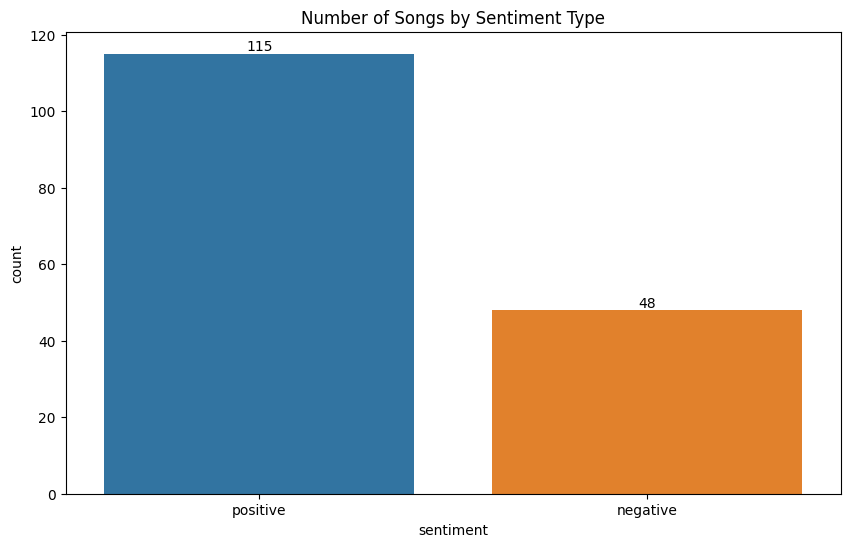

In [181]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data= df_clean, x= 'sentiment')
plt.title('Number of Songs by Sentiment Type')
ax.bar_label(ax.containers[0])
plt.show()

Now, we find the top 5 most positive and negative songs from Taylor Swift based on its lyrics sentiment.

**Top 5 Positive Songs**

In [182]:
top_5_pos = df_clean.sort_values('compound', ascending=False).head()
top_5_pos

,track_title,clean lyric,polarity,neg,neu,pos,compound,sentiment
60,London Boy,go driving scooter uh know round london oh id ...,"{'neg': 0.012, 'neu': 0.557, 'pos': 0.431, 'co...",0.012,0.557,0.431,0.9991,positive
76,Out of the Woods,looking seems simple lying couch remember took...,"{'neg': 0.027, 'neu': 0.573, 'pos': 0.4, 'comp...",0.027,0.573,0.400,0.9988,positive
91,Stay Beautiful,corys eyes like jungle smiles like radio whisp...,"{'neg': 0.024, 'neu': 0.591, 'pos': 0.385, 'co...",0.024,0.591,0.385,0.9980,positive
125,You Are in Love,one look dark room meant time moved fast play ...,"{'neg': 0.056, 'neu': 0.6, 'pos': 0.344, 'comp...",0.056,0.600,0.344,0.9979,positive
81,Sad Beautiful Tragic,long handwritten note deep pocket words little...,"{'neg': 0.156, 'neu': 0.373, 'pos': 0.471, 'co...",0.156,0.373,0.471,0.9978,positive


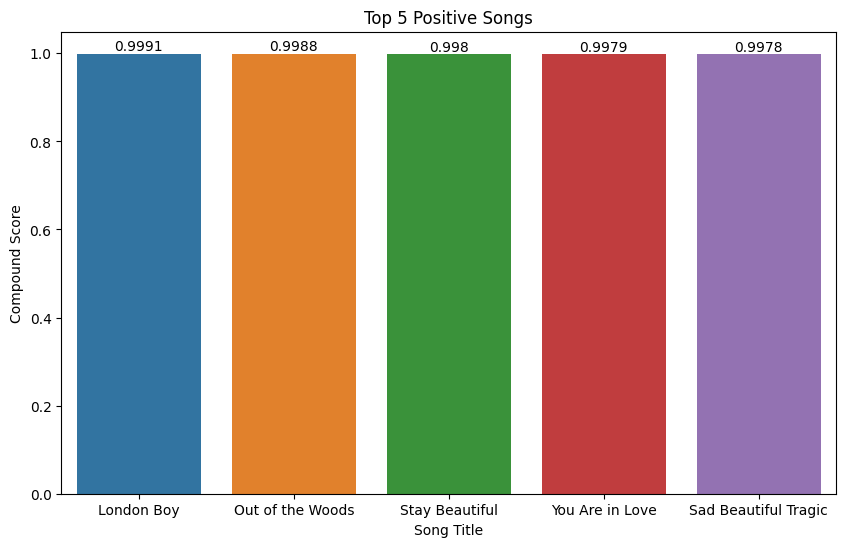

In [183]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_5_pos, x= 'track_title', y= 'compound')
ax.bar_label(ax.containers[0])
plt.title('Top 5 Positive Songs')
plt.xlabel('Song Title')
plt.ylabel('Compound Score')
plt.show()

**Top 5 Negative Songs**

In [184]:
top_5_neg = df_clean.sort_values('compound').head()
top_5_neg

,track_title,clean lyric,polarity,neg,neu,pos,compound,sentiment
82,Shake It Off,stay late got nothing brain thats people say m...,"{'neg': 0.57, 'neu': 0.315, 'pos': 0.115, 'com...",0.570,0.315,0.115,-0.9996,negative
111,This Love,clear blue water high tide came brought could ...,"{'neg': 0.578, 'neu': 0.329, 'pos': 0.093, 'co...",0.578,0.329,0.093,-0.9995,negative
48,I Knew You Were Trouble,upon time mistakes ago sights got alone found ...,"{'neg': 0.491, 'neu': 0.461, 'pos': 0.048, 'co...",0.491,0.461,0.048,-0.9989,negative
51,I Wish You Would,2am car windows pass street memories start say...,"{'neg': 0.455, 'neu': 0.426, 'pos': 0.119, 'co...",0.455,0.426,0.119,-0.9986,negative
78,Picture To Burn,state obvious didnt get perfect fantasy realiz...,"{'neg': 0.438, 'neu': 0.485, 'pos': 0.076, 'co...",0.438,0.485,0.076,-0.9983,negative


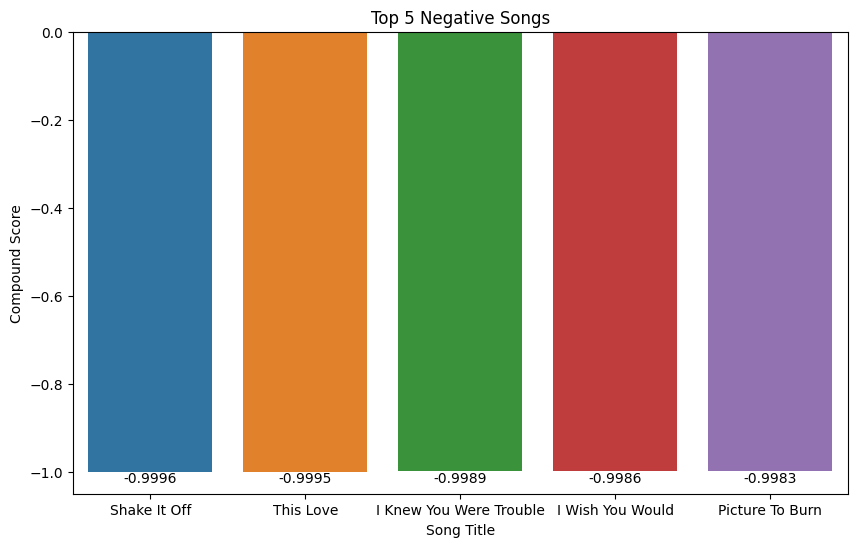

In [185]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_5_neg, x= 'track_title', y= 'compound')
ax.bar_label(ax.containers[0])
plt.title('Top 5 Negative Songs')
plt.xlabel('Song Title')
plt.ylabel('Compound Score')
plt.show()

**Word Analysis**

In this section, we want to find out what word does Taylor mostly used on her songs.

In [186]:
# we make a text of the words
words = ' '.join(list(df_clean['clean lyric']))

In [187]:
# define the positive and negative words using opinion_lexicon library
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

In [188]:
# we make a list of the positive and negative words
list_positive_words = [word for word in words.split() if word in positive_words]
list_negative_words = [word for word in words.split() if word in negative_words]

In [189]:
# function to count the frequency of each words
def count_word(words):
    counter = {}
    for word in words:
        if word in counter:
            counter[word] += 1
        else:
            counter[word] = 1
    return counter

- **Positive Words**

In [190]:
pos_words = count_word(list_positive_words)

In [191]:
# dataframe of positive words
df_pos_words = pd.DataFrame({
    'word' : pos_words.keys(),
    'freq' : pos_words.values()
}).sort_values('freq', ascending= False)

df_pos_words.head()

,word,freq
1,like,488
6,love,295
34,right,155
17,good,102
2,better,90


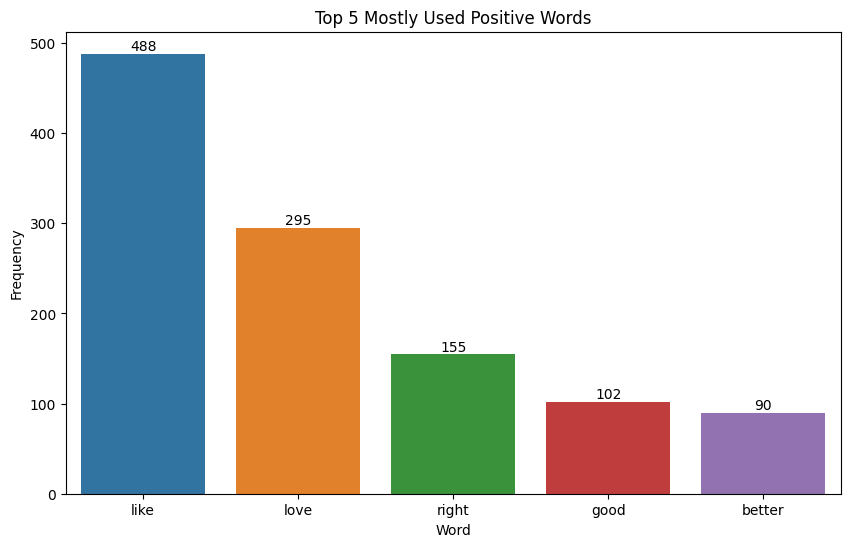

In [192]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_pos_words.head(), x= 'word', y= 'freq')
ax.bar_label(ax.containers[0])
plt.title('Top 5 Mostly Used Positive Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

Word Cloud

In [193]:
Mask = np.array(Image.open('Taylor_Swift_Speak_Now_cover.png'))

wordcloud = WordCloud(background_color= 'white', height= 1500, width= 1500, mask= Mask).generate(' '.join(list_positive_words))

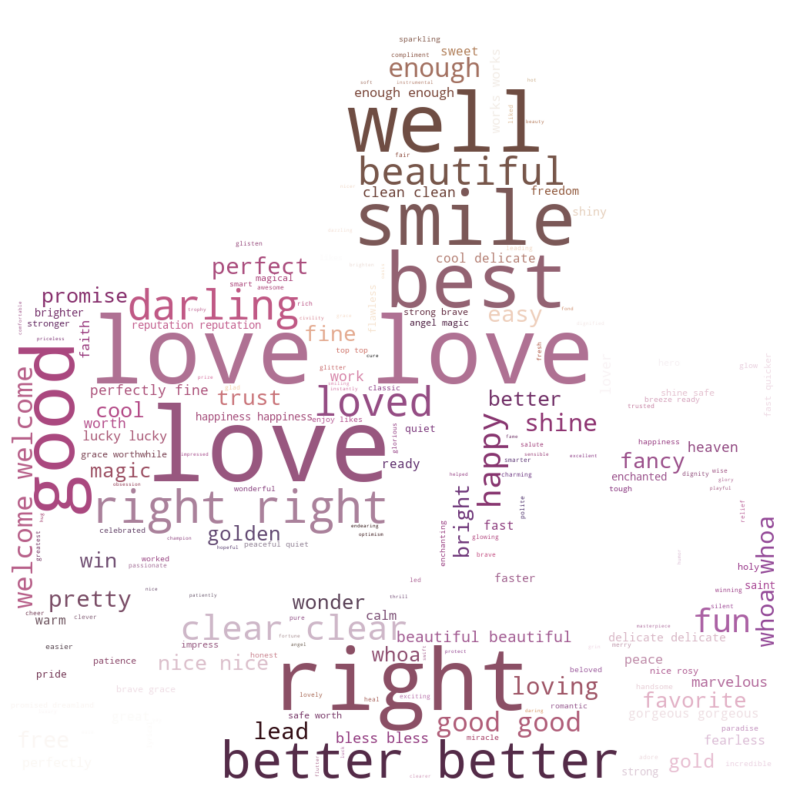

In [194]:
image_colors = ImageColorGenerator(Mask)

plt.figure(figsize= (10, 10))
plt.imshow(wordcloud.recolor(color_func= image_colors), interpolation= 'hamming')
plt.axis('off')
plt.show()

- **Negative Words**

In [195]:
neg_words = count_word(list_negative_words)

In [196]:
# dataframe of negative words
df_neg_words = pd.DataFrame({
    'word' : neg_words.keys(),
    'freq' : neg_words.values()
}).sort_values('freq', ascending= False)

df_neg_words.head()

,word,freq
10,bad,93
140,shake,81
11,break,62
39,mad,48
5,fall,45


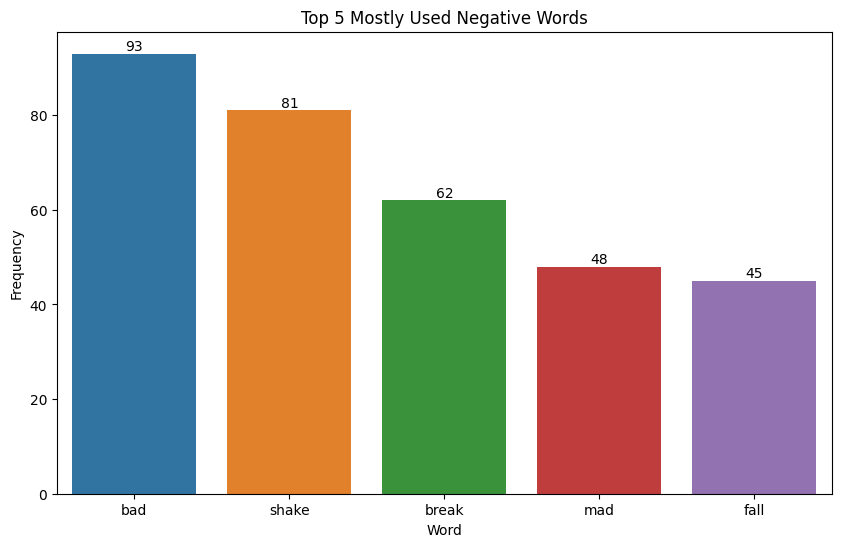

In [197]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_neg_words.head(), x= 'word', y= 'freq')
ax.bar_label(ax.containers[0])
plt.title('Top 5 Mostly Used Negative Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

Word Cloud

In [198]:
Mask = np.array(Image.open('Taylor_Swift_Speak_Now_cover.png'))

wordcloud = WordCloud(background_color= 'white', height= 1500, width= 1500, mask= Mask).generate(' '.join(list_negative_words))

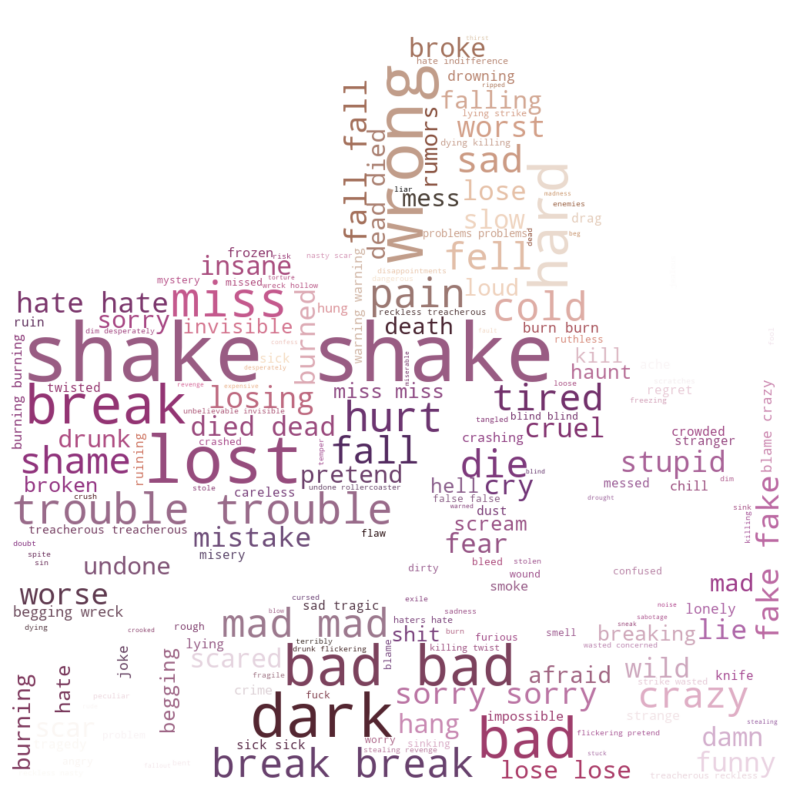

In [199]:
image_colors = ImageColorGenerator(Mask)

plt.figure(figsize= (10, 10))
plt.imshow(wordcloud.recolor(color_func= image_colors), interpolation= 'hamming')
plt.axis('off')
plt.show()

## **Conclusion**

- Most of the Taylor Swift's Songs (based on the 9 albums we used) have positive sentiment.

- The top 5 songs that have positive sentiment are:
    - London Boy
    - Out of the Woods
    - Stay Beautiful
    - You Are in Love
    - Sad Beautiful Tragic
<br><br>
- The top 5 songs that have negative sentiment are:
    - Shake It Off
    - This Love
    - I Knew You Were Trouble
    - I Wish You Would
    - Picture To Burn
<br><br>
- Most used positive words are : like, love, right, good, better

- Most used negative words are : bad, shake, break, mad , fall
